Olá, Reinner!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você conclui esse projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de mergulhar na análise dos seus dados, explique em suas palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [86]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st



## Carregue os dados

In [87]:
calls= pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")


## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [88]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
print(plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [89]:
# Imprima uma amostra de dados dos planos
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


- Sem dados ausentes
- A coluna plan name é a única variável categórica

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. O estudante apresentou corretamente os dados de `planos`.

</div>

## Corrija os dados & 1.6 Enriquecimento dos dados


- Sem linhas ausentes e correções a serem aplicadas ou fatores adicionais a serem incluídos

## Usuários

In [90]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [91]:
# Imprima uma amostra de dados dos usuários
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


Verificar se existem dados duplicados

In [92]:
print(users[users.duplicated(subset='user_id')==True])

Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []


- Não tem dados ausentes. 
- Não tem valores duplicados
- A coluna reg_dat está como object, mas poderia estar como datetime. Caso queiramos extrair informações como mês e dia, isso facilitaria
- Converter a coluna churn_date para datetime também

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. O estudante analisou os dados de `usuários`.

</div>

### Corrija os dados

Convertendo as colunas `reg_date`e `churn_date` para o formato datetime

In [93]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date']=pd.to_datetime(users['churn_date'])
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


### Enriqueça os dados

Criar a coluna month com a informação do mês relativo a coluna reg_date 

In [94]:
users['reg_month']=users['reg_date'].dt.month
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  reg_month  
0 2018-12-24  ultimate        NaT         12  
1 2018-08-13      surf        NaT          8  
2 2018-10-21      surf        NaT         10  
3 2018-01-28      surf        NaT          1  
4 2018-05-23      surf        NaT          5  


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. O estudante converteu os atributos do tipo data e usou acessou o mês usando `.dt.month`.

</div>

## Chamadas

In [95]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas

print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [96]:
# Imprima uma amostra de dados das chamadas
print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


In [97]:
print(calls[calls.duplicated(subset='id')==True])

Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []


- Sem valores ausentes.
- Sem valores duplicados.
- Podemos converter o formato da coluna call_date de object para datetime facilitando assim futuras operações com os 
valores dos dias e mês
- Converter a coluna id para inteiro

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. O estudante analisou corretamente os dados de `chamadas`.

</div>

### Corrija os dados

Convertendo a coluna call_date para o formato datetime

In [98]:
calls['call_date']=pd.to_datetime(calls['call_date'])
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


Converter os valores da coluna id para inteiro

In [99]:
calls['id']=calls['id'].astype(int)
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  int64         
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.2 MB
None


### Enriqueça os dados

Criar a coluna month com a informação do mês relativo a coluna call_date

In [100]:
calls['month'] = calls['call_date'].dt.month
print(calls.head())

        id  user_id  call_date  duration  month
0   100093     1000 2018-12-27      8.52     12
1  1000145     1000 2018-12-27     13.66     12
2  1000247     1000 2018-12-27     14.48     12
3  1000309     1000 2018-12-28      5.76     12
4  1000380     1000 2018-12-30      4.22     12


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. O estudante transformou corretamente os tipos de dados.

</div>

## Mensagens

In [101]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
print(messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [102]:
# Imprima uma amostra dos dados das mensagens
print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Verificar se temos dados duplicados

In [103]:
print(messages[messages.duplicated(subset='id')==True])

Empty DataFrame
Columns: [id, user_id, message_date]
Index: []


- Sem valores ausentes.
- Sem valores duplicados.
- Podemos converter o formato da coluna message_date de object para datetime facilitando assim futuras operações com os valores dos dias e mês
- Converter a coluna id para inteiro

### Corrija os dados

convertendo os dados da coluna message_date para datetime

In [104]:
messages['message_date']=pd.to_datetime(messages['message_date'])
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


Converter os valores da coluna id para inteiro

In [105]:
messages['id']=messages['id'].astype(int)
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  int64         
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.7 MB
None


### Enriqueça os dados

Criar a coluna month com a informação do mês relativo a coluna message_date

In [106]:
messages['month']=messages['message_date'].dt.month
print(messages.head())

        id  user_id message_date  month
0  1000125     1000   2018-12-27     12
1  1000160     1000   2018-12-31     12
2  1000223     1000   2018-12-31     12
3  1000251     1000   2018-12-27     12
4  1000255     1000   2018-12-26     12


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. O estudante executou as seguintes etapas:
- Explorou o conjunto de dados de mensagens usando métodos `head()` e `info()`
- Verificou a existência de duplicados e valores ausentes
- Transformou os tipos de dados
- Acessou o mês da data usando `.dt.month`

</div>

## Internet

In [107]:
# Imprima as informações gerais/resumidas sobre o DataFrame da internet

print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [108]:
#  Imprima uma amostra de dados para o tráfego da internet

print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


Verificar se existem dados duplicados

In [109]:
print(internet[internet.duplicated(subset='id')==True])

Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: []


- Sem valores ausentes.
- Sem valores duplicados
- Podemos converter o formato da coluna session_date de object para datetime facilitando assim futuras operações com os valores dos dias e mês
- Converter a coluna id para inteiro

### Corrija os dados

Converter a coluna session_date para o formato datetime

In [110]:
internet['session_date']=pd.to_datetime(internet['session_date'])
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


Converter os valores da coluna id para inteiro

In [111]:
internet['id']=internet['id'].astype(int)
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  int64         
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 MB
None


### Enriqueça os dados

Criar a coluna month com a informação do mês relativo a coluna message_date

In [112]:
internet['month']=internet['session_date'].dt.month
print(internet.head())

        id  user_id session_date  mb_used  month
0   100013     1000   2018-12-29    89.86     12
1  1000204     1000   2018-12-31     0.00     12
2  1000379     1000   2018-12-28   660.40     12
3  1000413     1000   2018-12-26   270.99     12
4  1000442     1000   2018-12-27   880.22     12


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. O estudante executou as seguintes etapas:
- Explorou o conjunto de dados de internet usando métodos `head()` e `info()`
- Verificou a existência de duplicados e valores ausentes
- Transformou os tipos de dados
- Acessou o mês da data usando `.dt.month`

</div>

## Estude as condições dos planos

[É fundamental entender como os planos funcionam e como são as cobranças dos usuários com base na assinatura. Sugerimos imprimir as informações do plano para visualizar novamente as condições.]

In [113]:
# Imprima as condições do plano e certifique-se de que elas fazem sentido para você
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregue os dados por usuário

[Agora, como os dados estão limpos, agregue os dados por usuário por período para ter apenas um registro por usuário por período. Isso vai facilitar muito a análise posterior.]

In [114]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

print(calls.head())

        id  user_id  call_date  duration  month
0   100093     1000 2018-12-27      8.52     12
1  1000145     1000 2018-12-27     13.66     12
2  1000247     1000 2018-12-27     14.48     12
3  1000309     1000 2018-12-28      5.76     12
4  1000380     1000 2018-12-30      4.22     12


Vamos arrendondar a coluna duration para cima de acordo com a regra do plano. Para isto irei criar uma função de arredondamento

In [115]:
def ceil_round(value):
    return math.ceil(value)

#usando a função applu() em conjunto com o ceil_round
calls['duration']=calls['duration'].apply(ceil_round)
print(calls.head())


        id  user_id  call_date  duration  month
0   100093     1000 2018-12-27         9     12
1  1000145     1000 2018-12-27        14     12
2  1000247     1000 2018-12-27        15     12
3  1000309     1000 2018-12-28         6     12
4  1000380     1000 2018-12-30         5     12


In [116]:
#agrupando por usuário, mês e a quantidade de chamadas feitas
#ordenando a partir do usuário que fez o maior número de chamadas
calls_grouped=calls.groupby(['user_id','month'])['duration']
calls_count = calls_grouped.count()
print(calls_count.sort_values(ascending=False))


user_id  month
1267     12       205
1329     12       191
1382     8        182
1240     9        180
1365     12       180
                 ... 
1339     11         1
         9          1
1310     11         1
1094     10         1
1044     8          1
Name: duration, Length: 2258, dtype: int64


In [117]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
calls_sum=calls_grouped.sum().reset_index()
print(calls_sum.sort_values(by='duration',ascending=False))


      user_id  month  duration
1242     1267     12      1510
1487     1329     12      1369
1669     1365     12      1357
1459     1324     11      1304
1737     1382     12      1295
...       ...    ...       ...
1383     1306     11         6
1905     1414      8         4
1539     1339      9         2
432      1094     10         0
1873     1407     11         0

[2258 rows x 3 columns]


In [118]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
messages_grouped=messages.groupby(['user_id','month'])
messages_count=messages_grouped['id'].count().reset_index().rename(columns={'id':'messages'})
print(messages_count.head())


   user_id  month  messages
0     1000     12        11
1     1001      8        30
2     1001      9        44
3     1001     10        53
4     1001     11        36


In [119]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
internet_grouped=internet.groupby(['user_id','month'])['mb_used']
internet_sum=internet_grouped.sum().reset_index()
print(internet_sum.head())


   user_id  month   mb_used
0     1000     12   1901.47
1     1001      8   6919.15
2     1001      9  13314.82
3     1001     10  22330.49
4     1001     11  18504.30


Segundo a regra do plano: o total do mês é arredondado para cima. Vamos realizar este arredondamento.

In [120]:
#Precisamos arredondar os valores de consumo de internet(mb_used) para o múltiplo de 1024 (1 gb = 1024 mb) mais próximo acima.
#utilizando a função math.ceil vamos arredondar o resultado da divisão do valor pelo múltiplo para o interiro mais próximo
#Multiplicando esse resultado por 1000 teremos o valor na mesma unidade de medida (mb)

for index,row in internet_sum.iterrows():
    internet_sum.at[index,'mb_used']=math.ceil(row['mb_used']/1024)*1024
print(internet_sum.head())
    


   user_id  month  mb_used
0     1000     12   2048.0
1     1001      8   7168.0
2     1001      9  14336.0
3     1001     10  22528.0
4     1001     11  19456.0


In [121]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
print(calls_sum)
print()
print(messages_count)
print()
print(internet_sum)
user_profile = calls_sum.merge(messages_count,on=['user_id','month'],how='outer')
user_profile = user_profile.merge(internet_sum,on=['user_id','month'],how='outer')
print(user_profile)

      user_id  month  duration
0        1000     12       124
1        1001      8       182
2        1001      9       315
3        1001     10       393
4        1001     11       426
...       ...    ...       ...
2253     1498     12       339
2254     1499      9       346
2255     1499     10       385
2256     1499     11       308
2257     1499     12       496

[2258 rows x 3 columns]

      user_id  month  messages
0        1000     12        11
1        1001      8        30
2        1001      9        44
3        1001     10        53
4        1001     11        36
...       ...    ...       ...
1801     1496      9        21
1802     1496     10        18
1803     1496     11        13
1804     1496     12        11
1805     1497     12        50

[1806 rows x 3 columns]

      user_id  month  mb_used
0        1000     12   2048.0
1        1001      8   7168.0
2        1001      9  14336.0
3        1001     10  22528.0
4        1001     11  19456.0
...       ...    ...    

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Aqui você está fazendo o join entre os conjuntos de dados usando o `inner`, porém essa estratégia irá fazer um filtro na tabela resultante para manter somente os usuários que existem nos dois casos e também fizeram uma ação no mesmo mês. Por exemplo, você irá manter somente usuários que fizeram chamada e enviaram mensagem. O que acontece se um usuário enviou mensagem mas não teve nenhuma ligação naquele mês?</s>

<br>

<s>Para fazer esse merge, use o `outer` para preservar os dados de todos os conjuntos de dados. Essa figura mostra o que é executado em cada tipo de operação: https://miro.medium.com/v2/resize:fit:1400/format:webp/1*9eH1_7VbTZPZd9jBiGIyNA.png. Repare que essa etapa pode mudar completamente o resto da sua análise.</s>
    
<br>
    
<s>Separe também a execução das funções `merge` em mais de uma chamada para melhor legibilidade do código.</s>

</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor v2</b> <a class="tocSkip"></a>

Perfeito!

</div>


In [122]:
# Adicione as informações sobre o plano
#Alterar o nome da coluna plan para plan_name para poder ficar igual a coluna da tabela plans
user_profile = user_profile.merge(users[['user_id','plan','city']],on ='user_id', how='left')
user_profile=user_profile.rename(columns={'plan':'plan_name'})
user_profile = user_profile.merge(plans,on='plan_name',how='inner')
print(user_profile)

      user_id  month  duration  messages  mb_used plan_name  \
0        1000     12     124.0      11.0   2048.0  ultimate   
1        1006     11      10.0      15.0   3072.0  ultimate   
2        1006     12      59.0     139.0  32768.0  ultimate   
3        1008     10     476.0      21.0  17408.0  ultimate   
4        1008     11     446.0      37.0  24576.0  ultimate   
...       ...    ...       ...       ...      ...       ...   
2288     1194     12       NaN      56.0  31744.0      surf   
2289     1349     10       NaN      76.0  13312.0      surf   
2290     1349     11       NaN      72.0  17408.0      surf   
2291     1349     12       NaN      61.0  13312.0      surf   
2292     1361      5       NaN       2.0   2048.0      surf   

                                        city  messages_included  \
0      Atlanta-Sandy Springs-Roswell, GA MSA               1000   
1     San Francisco-Oakland-Berkeley, CA MSA               1000   
2     San Francisco-Oakland-Berkeley, CA M

Neste caso vou precisar tratar os itens NaN. irei substituir por 0, pois ou não houve ligação, envio de mensagem ou consumo de internet

In [123]:
#substituindo os valores NaN por 0
user_profile['duration']=user_profile['duration'].fillna(0)
print(user_profile[user_profile['duration'].isna()==True])

Empty DataFrame
Columns: [user_id, month, duration, messages, mb_used, plan_name, city, messages_included, mb_per_month_included, minutes_included, usd_monthly_pay, usd_per_gb, usd_per_message, usd_per_minute]
Index: []


In [124]:
#substituindo os valores NaN por 0
user_profile['messages']=user_profile['messages'].fillna(0)
print(user_profile[user_profile['messages'].isna()==True])

Empty DataFrame
Columns: [user_id, month, duration, messages, mb_used, plan_name, city, messages_included, mb_per_month_included, minutes_included, usd_monthly_pay, usd_per_gb, usd_per_message, usd_per_minute]
Index: []


In [125]:
#substituindo os valores NaN por 0
user_profile['mb_used']=user_profile['mb_used'].fillna(0)
print(user_profile[user_profile['mb_used'].isna()==True])

Empty DataFrame
Columns: [user_id, month, duration, messages, mb_used, plan_name, city, messages_included, mb_per_month_included, minutes_included, usd_monthly_pay, usd_per_gb, usd_per_message, usd_per_minute]
Index: []


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Mesma observação sobre o `join`. Revise essa implementação.</s>

</div>

Neste caso utilizei o modo inner, pois já tenho o dataframe customizado com as informações, estou apenas acrescentando a informação do nome do plano e dos requisitos do plano. Ou seja, cada usuário tem apenas 1 plano e cada plano tem somente uma base de requisitos.

[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano de chamadas; adicione o preço mensal dependendo do plano. Importante: isso pode não ser tão trivial quanto apenas algumas linhas, dadas as condições do plano. Portanto, não há problema em gastar algum tempo nisso.]

In [126]:
# Calcule a receita mensal para cada usuário
#Vamos criar uma função de cálculo
#Função filtro do plano
#Função income = calcula o valor da receita com base no tipo de gasto(call, messages e internet)

def plan_filter(dataframe, plan):
    
    return dataframe['plan_name'] == plan

def income(item, dataframe, plan):
    if plan == 'ultimate':
        cost = 0.01 #custo adicional plano ultimate
        internet_cost = 7 #custo adicional plano ultimate
    else:
        cost = 0.03  #custo adicional para o plano surf
        internet_cost= 10 #custo adicional para o plano surf
    if item == 'call':
        return np.maximum(0,(dataframe['duration'] - dataframe['minutes_included'])*cost)
    elif item == 'message':
        return np.maximum(0,(dataframe['messages'] - dataframe['messages_included'])*cost)
    elif item == 'internet':
        return np.maximum(0,(dataframe['mb_used'] / 1024 - dataframe['mb_per_month_included'] / 1024)*internet_cost)

user_profile['total_income'] = np.where(
    plan_filter(user_profile, 'ultimate'),
    np.maximum(0, income('call', user_profile, 'ultimate') ) +
    np.maximum(0, income('message', user_profile, 'ultimate')) +
    np.maximum(0, income('internet', user_profile, 'ultimate') + 70),
    np.maximum(0, income('call', user_profile, 'surf')) +
    np.maximum(0, income('message', user_profile, 'surf')) +
    np.maximum(0, income('internet', user_profile, 'surf')+ 20)
)
                                        
print(user_profile)


      user_id  month  duration  messages  mb_used plan_name  \
0        1000     12     124.0      11.0   2048.0  ultimate   
1        1006     11      10.0      15.0   3072.0  ultimate   
2        1006     12      59.0     139.0  32768.0  ultimate   
3        1008     10     476.0      21.0  17408.0  ultimate   
4        1008     11     446.0      37.0  24576.0  ultimate   
...       ...    ...       ...       ...      ...       ...   
2288     1194     12       0.0      56.0  31744.0      surf   
2289     1349     10       0.0      76.0  13312.0      surf   
2290     1349     11       0.0      72.0  17408.0      surf   
2291     1349     12       0.0      61.0  13312.0      surf   
2292     1361      5       0.0       2.0   2048.0      surf   

                                        city  messages_included  \
0      Atlanta-Sandy Springs-Roswell, GA MSA               1000   
1     San Francisco-Oakland-Berkeley, CA MSA               1000   
2     San Francisco-Oakland-Berkeley, CA M

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Esse trecho ficou um pouco complexo, considere usar uma função para calcular esse atributo de receita. A criação de uma função é uma boa prática também de programação para facilitar reuso de código.

</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2 </b> <a class="tocSkip"></a>
    
Muito melhor!

</div>

## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados e unidos, que geralmente revelam uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para chamadas, mas elas não são fornecidas para mensagens e internet, embora o princípio do estudo estatístico seja o mesmo para todas.]

### Chamadas

Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.

In [127]:
#Filtrar pelo plano ultimate
#Agrupar por mês e aplicar a média na coluna duration
user_profile_ultimate=user_profile[user_profile['plan_name']=='ultimate']
mean_call_ultimate= user_profile_ultimate.groupby(by='month')['duration'].mean().reset_index().rename(columns={'duration':'ultimate_duration'})
print(mean_call_ultimate)

    month  ultimate_duration
0       1         193.500000
1       2         403.142857
2       3         304.250000
3       4         336.857143
4       5         406.241379
5       6         370.957447
6       7         427.067797
7       8         421.436620
8       9         437.511628
9      10         450.735849
10     11         445.196850
11     12         459.099338


In [128]:
#Filtrar pelo plano surf
#Agrupar por mês e aplicar a média na coluna duration
user_profile_surf = user_profile[user_profile['plan_name']=='surf']
mean_call_surf= user_profile_surf.groupby(by='month')['duration'].mean().reset_index().rename(columns={'duration':'surf_duration'})
print(mean_call_surf)


    month  surf_duration
0       1     203.000000
1       2     297.000000
2       3     330.000000
3       4     351.540000
4       5     399.584416
5       6     431.298969
6       7     449.983471
7       8     410.111111
8       9     414.226804
9      10     429.729958
10     11     423.325088
11     12     473.836478


In [129]:
#Unificar os dois dataframes pela coluna mês
mean_call_plan = mean_call_ultimate.merge(mean_call_surf,on='month', how='inner')
print(mean_call_plan)

    month  ultimate_duration  surf_duration
0       1         193.500000     203.000000
1       2         403.142857     297.000000
2       3         304.250000     330.000000
3       4         336.857143     351.540000
4       5         406.241379     399.584416
5       6         370.957447     431.298969
6       7         427.067797     449.983471
7       8         421.436620     410.111111
8       9         437.511628     414.226804
9      10         450.735849     429.729958
10     11         445.196850     423.325088
11     12         459.099338     473.836478


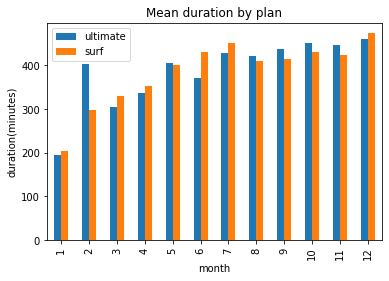

In [130]:
mean_call_plan.plot(title='Mean duration by plan',kind='bar',x='month'\
                    ,y=['ultimate_duration','surf_duration'],legend=True,ylabel='duration(minutes)')\
                    .legend(['ultimate','surf']) ;

Gráficos de linha são melhores para visualizar dados cronologicamente. Além de reduzirmos a saturação, pois antes tinhamos 24 barras e agora apenas 2 linhas
Podemos perceber a crescente na duração das chamdas do plano surf frente ao plano ultimate


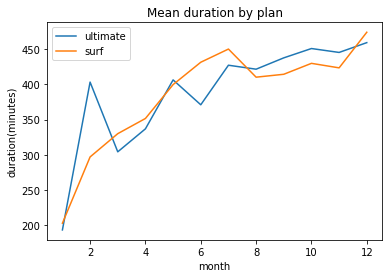

In [131]:
mean_call_plan.plot(title='Mean duration by plan',x='month'\
                    ,y=['ultimate_duration','surf_duration'],legend=True,ylabel='duration(minutes)')\
                    .legend(['ultimate','surf']);

Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.

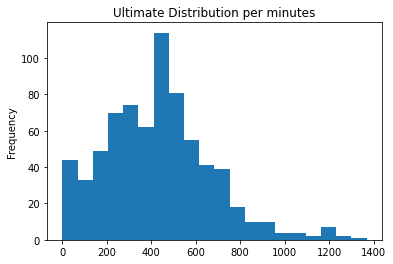

In [132]:
#Quantidade de minutos para o plano ultimate
user_profile_ultimate['duration'].plot(kind='hist',bins=20,title='Ultimate Distribution per minutes');


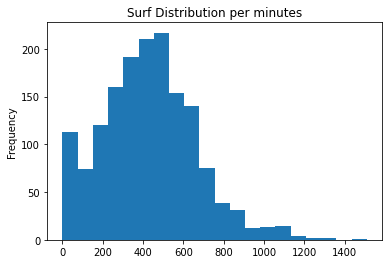

In [133]:
#Quantidade de minutos para o plano surf
user_profile_surf['duration'].plot(kind='hist',bins=20,title='Surf Distribution per minutes');

Podemos perceber que os 2 planos tem curvas parecidas simétricas a direita.
Mas o plano surf temuma maior quantidade de usuários que utilizam entre 400-500 minutos

[Calcule a média e a variável da duração da chamada para raciocinar se os usuários de diferentes planos possuem comportamentos diferentes em suas chamadas.]

In [134]:
# Calcule a média e a variação da duração mensal das chamadas
print('A média da duração mensal das chamadas para o plano ultimate é:',round(mean_call_plan['ultimate_duration'].mean()),'minutos')
print('O desvio padrão é:',np.std(mean_call_plan['ultimate_duration']))
print('A média da duração mensal das chamadas para o plano surf é:',round(mean_call_plan['surf_duration'].mean()),'minutos')
print('O desvio padrão é:',np.std(mean_call_plan['surf_duration']))

A média da duração mensal das chamadas para o plano ultimate é: 388 minutos
O desvio padrão é: 73.97662403593012
A média da duração mensal das chamadas para o plano surf é: 384 minutos
O desvio padrão é: 73.27722669360791


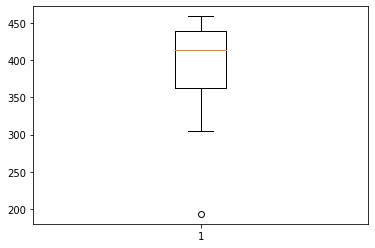

In [135]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
plt.boxplot(mean_call_plan['ultimate_duration'])
plt.show()


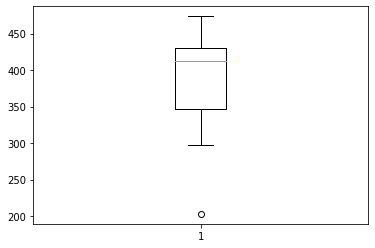

In [136]:
plt.boxplot(mean_call_plan['surf_duration'])
plt.show()


[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

- Quando olhamos para a média mês a mês percebemos diferença de consumo entre os planos
- Ao comparar a média mensal de cada plano não se percebe diferenças
- Mas ao analisar a dispersão da média percebemos que o plano surf está mais próximo da média, com uma menor dispersão comparado ao plano ultimate.
- A mediana dos 2 está proxima, mas no plano surf a median está mais deslocada para o Q3, o que nos mostra que uma quantidade maior de pessoas (próximo a 75%) utiliza 425 min ou menos
- O mínimo para o plano surf é de 300 min, já para o plano ultimate algo próximo de 325 min.
- No plano surf não temos outliers, já no plano ultimate temos em 200 min, o que acaba trazendo a média mais para baixo.
- Para o plano surf a distribuição fica entre 360 - 440 min 
- E para o plano ultimate de 400 - 470 min

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Correto. O estudante executou as seguintes etapas:
    
- Usou corretamente gráficos de barras e linhas para apresentar análises temporais
- Usou histogramas e boxplots para analisar a distribuição dos dados
- Calculou a média e desvio padrão para as variáveis
- Apresentou conclusões pertinentes
- Fez o estudo de outliers por plano
</div>

Com base nessas observações pode-se inferir que temos padrões de comportamento com relação a duração das chamadas diferentes em cada plano

### Mensagens

In [137]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês
messages_month_ultimate=user_profile_ultimate.groupby(by='month')['messages']\
                        .sum().reset_index().rename(columns={'messages':'ultimate_messages'})
print(messages_month_ultimate)


    month  ultimate_messages
0       1               62.0
1       2              151.0
2       3              243.0
3       4              463.0
4       5              931.0
5       6             1379.0
6       7             1937.0
7       8             2732.0
8       9             3259.0
9      10             4181.0
10     11             4903.0
11     12             6796.0


In [138]:
messages_month_surf=user_profile_surf.groupby(by='month')['messages']\
                        .sum().reset_index().rename(columns={'messages':'surf_messages'})
print(messages_month_surf)

    month  surf_messages
0       1           21.0
1       2          108.0
2       3          351.0
3       4          870.0
4       5         1849.0
5       6         2454.0
6       7         3271.0
7       8         4662.0
8       9         5968.0
9      10         8020.0
10     11         9165.0
11     12        12275.0


In [139]:
#Juntando os dois dataframes
messages_month=messages_month_ultimate.merge(messages_month_surf,on='month',how='left')
print(messages_month)

    month  ultimate_messages  surf_messages
0       1               62.0           21.0
1       2              151.0          108.0
2       3              243.0          351.0
3       4              463.0          870.0
4       5              931.0         1849.0
5       6             1379.0         2454.0
6       7             1937.0         3271.0
7       8             2732.0         4662.0
8       9             3259.0         5968.0
9      10             4181.0         8020.0
10     11             4903.0         9165.0
11     12             6796.0        12275.0


Utilizando gráfico de linha para comparar a quantidade de envio por mês de cada plano

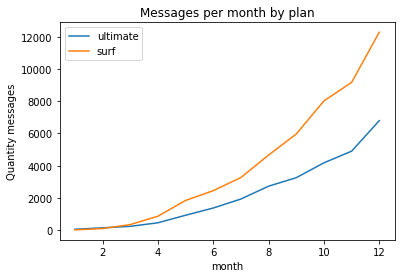

In [140]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
messages_month.plot(title='Messages per month by plan',x='month'\
                    ,y=['ultimate_messages','surf_messages'],ylabel='Quantity messages')\
                    .legend(['ultimate','surf']);


- Os 2 planos tem o mesmo padrão de envio de menssagens.
- A quantidade de mensagens vai aumentando exponencialmente até o mês 12 (maior quantidade de envio de mensagens dos 2 planos)
- O plano surf envia mais mensagens do que o plano ultimate

[Formule conclusões sobre como os usuários se comportam em termos de mensagens. O comportamento é diferente dependendo do plano?]

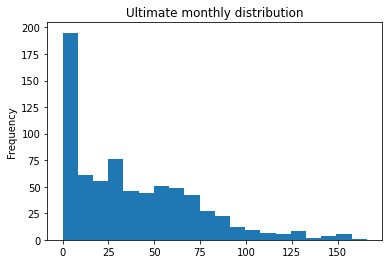

In [141]:
user_profile_ultimate['messages'].plot(kind='hist',bins=20, title='Ultimate monthly distribution');

A distribuição é assimétrica a direita. Com maior frequência entre 30-40 mensagens por mês

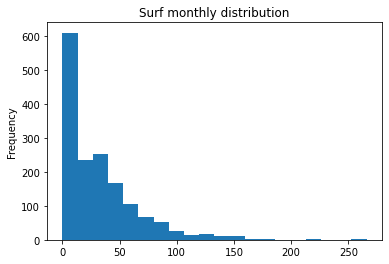

In [142]:
user_profile_surf['messages'].plot(kind='hist',bins=20, title='Surf monthly distribution');

- Também temos uma distribuição assimétrica a direita, mas mais concentrada na extremidade esquerda. 
- A distribuição nos mostra que a quantidade de mensagens enviadas é mais distribuídas no plano ultimate do que no plano surf

In [143]:
print('A média de mensagens enviadas por mês no plano ultimate é:',round(messages_month['ultimate_messages'].mean()))
print('A variação em torno da média é:',round(np.std(messages_month['ultimate_messages'])))
print('A média de mensagens enviadas por mês no plano surf é:',round(messages_month['surf_messages'].mean()))
print('A variação em torno da média é:',round(np.std(messages_month['surf_messages'])))

A média de mensagens enviadas por mês no plano ultimate é: 2253
A variação em torno da média é: 2076
A média de mensagens enviadas por mês no plano surf é: 4084
A variação em torno da média é: 3843


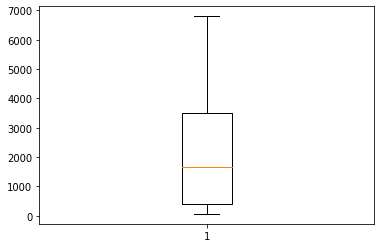

In [144]:
plt.boxplot(messages_month['ultimate_messages'])
plt.show()

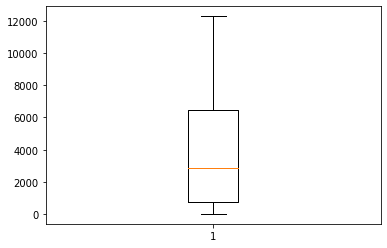

In [145]:
plt.boxplot(messages_month['surf_messages'])
plt.show()

Avaliando os 2 boxplots podemos inferir:
- A mediana das mensagens do plano ultimate é próximo de 1500 mensagens
- Enqunato a mediana do plano surf 3000 mensagens.
- Nenhum dos dois tem outliers
- 75% dos usuários do plano ultimate enviam menos de 3500 mensagens por mês
- Já no plano surf esse número sobe para 6000 mensagens

Podendo concluir que os usuários do plano surf enviam mais mensagens que o os usuários do plano ultimate

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Correto. O estudante executou as seguintes etapas:
    
- Usou corretamente gráficos de barras e linhas para apresentar análises temporais
- Usou histogramas e boxplots para analisar a distribuição dos dados
- Calculou a média e desvio padrão para as variáveis
- Apresentou conclusões pertinentes
- Fez o estudo de outliers por plano
</div>

### Internet

In [146]:
#Quantidade de mb utilizados no plano ultimate por mês
internet_ultimate = user_profile_ultimate.groupby(by='month')['mb_used'].sum().reset_index()\
                    .rename(columns={'mb_used':'ultimate_mb_used'})
print(internet_ultimate)
    

    month  ultimate_mb_used
0       1           29696.0
1       2          123904.0
2       3          226304.0
3       4          351232.0
4       5          500736.0
5       6          742400.0
6       7          996352.0
7       8         1297408.0
8       9         1498112.0
9      10         1923072.0
10     11         2226176.0
11     12         2844672.0


In [147]:
#Quantidade de mb utilizados no plano surf por mês
internet_surf = user_profile_surf.groupby(by='month')['mb_used'].sum().reset_index()\
                    .rename(columns={'mb_used':'surf_mb_used'})
print(internet_surf)
    

    month  surf_mb_used
0       1       10240.0
1       2      112640.0
2       3      319488.0
3       4      625664.0
4       5     1113088.0
5       6     1538048.0
6       7     2091008.0
7       8     2800640.0
8       9     3315712.0
9      10     4225024.0
10     11     4761600.0
11     12     5939200.0


O plano de internet segue o mesmo padrão de consumo das mensagens:
- O consumo de internet no plano surf é maior que no plano ultimate

In [148]:
#Juntando os dois dataframes
internet_month=internet_ultimate.merge(internet_surf,on='month',how='left')
print(internet_month)

    month  ultimate_mb_used  surf_mb_used
0       1           29696.0       10240.0
1       2          123904.0      112640.0
2       3          226304.0      319488.0
3       4          351232.0      625664.0
4       5          500736.0     1113088.0
5       6          742400.0     1538048.0
6       7          996352.0     2091008.0
7       8         1297408.0     2800640.0
8       9         1498112.0     3315712.0
9      10         1923072.0     4225024.0
10     11         2226176.0     4761600.0
11     12         2844672.0     5939200.0


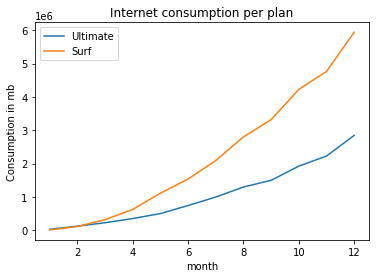

In [149]:
#Utilizando do gráfico de linha para comparar o consumo mês por plano
internet_month.plot(x='month', y=['ultimate_mb_used','surf_mb_used'],ylabel='Consumption in mb'\
                    ,title='Internet consumption per plan',xlabel='month')\
                    .legend(['Ultimate','Surf']);


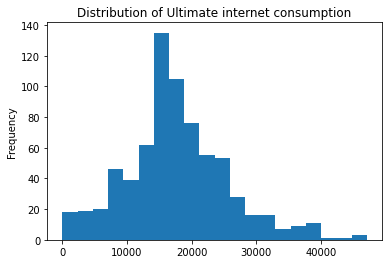

In [150]:
user_profile_ultimate['mb_used'].plot(kind='hist',bins=20,title='Distribution of Ultimate internet consumption');

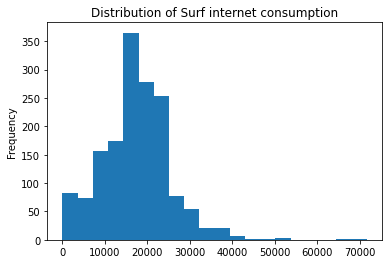

In [151]:
user_profile_surf['mb_used'].plot(kind='hist',bins=20,title='Distribution of Surf internet consumption');

- A curva de distribuição do plano ultimate é normalizada com uma frequência distribuída entre 15-25 gb
- A curva do plano surf também é normalizada, mas com uma freqência maior em 15 gb

In [152]:
print('A média de consumo de internet por mês no plano ultimate é:',round(internet_month['ultimate_mb_used'].mean()))
print('A variação em torno da média é:',round(np.std(internet_month['ultimate_mb_used'])))
print('A média de consumo de internet por mês no plano surf é:',round(internet_month['surf_mb_used'].mean()))
print('A variação em torno da média é:',round(np.std(internet_month['surf_mb_used'])))

A média de consumo de internet por mês no plano ultimate é: 1063339
A variação em torno da média é: 870392
A média de consumo de internet por mês no plano surf é: 2237696
A variação em torno da média é: 1893653


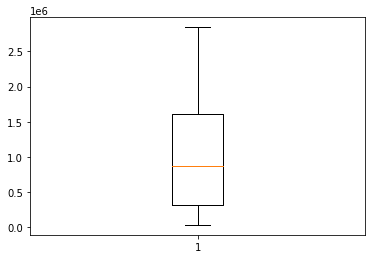

In [153]:
plt.boxplot(internet_month['ultimate_mb_used']);
plt.show()

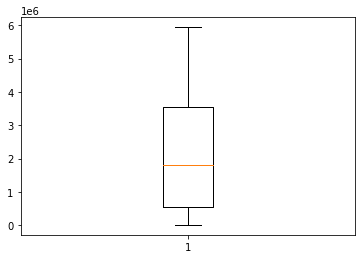

In [154]:
plt.boxplot(internet_month['surf_mb_used']);
plt.show()

- Pelo box plot é possível ver que a mediana do consumo do plano ultimate é menor que a do plano surf
- Que os valores do Q3 também são maiores no plano surf
- Não temos outliers

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Correto. O estudante executou as seguintes etapas:
    
- Usou corretamente gráficos de barras e linhas para apresentar análises temporais
- Usou histogramas e boxplots para analisar a distribuição dos dados
- Calculou a média e desvio padrão para as variáveis
- Apresentou conclusões pertinentes
- Fez o estudo de outliers por plano
</div>

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

In [155]:
#Receita mensal do plano ultimate
ultimate_total_income= user_profile_ultimate.groupby(by='month')['total_income'].sum()\
      .reset_index().rename(columns={'total_income':'ultimate_total_income'})
print(ultimate_total_income)

    month  ultimate_total_income
0       1                  280.0
1       2                  490.0
2       3                  896.0
3       4                 1533.0
4       5                 2051.0
5       6                 3367.0
6       7                 4242.0
7       8                 5173.0
8       9                 6195.0
9      10                 7665.0
10     11                 9107.0
11     12                11067.0


In [156]:
#Receita mensal do plano surf
surf_total_income =user_profile_surf.groupby(by='month')['total_income'].sum()\
      .reset_index().rename(columns={'total_income':'surf_total_income'})
print(surf_total_income)

    month  surf_total_income
0       1              40.00
1       2             309.57
2       3            1056.65
3       4            2035.53
4       5            3667.37
5       6            4779.80
6       7            7583.56
7       8           10356.85
8       9           11304.67
9      10           15504.83
10     11           16415.21
11     12           22437.14


In [157]:
month_total_income = ultimate_total_income.merge(surf_total_income,on='month',how='left')
print(month_total_income)

    month  ultimate_total_income  surf_total_income
0       1                  280.0              40.00
1       2                  490.0             309.57
2       3                  896.0            1056.65
3       4                 1533.0            2035.53
4       5                 2051.0            3667.37
5       6                 3367.0            4779.80
6       7                 4242.0            7583.56
7       8                 5173.0           10356.85
8       9                 6195.0           11304.67
9      10                 7665.0           15504.83
10     11                 9107.0           16415.21
11     12                11067.0           22437.14


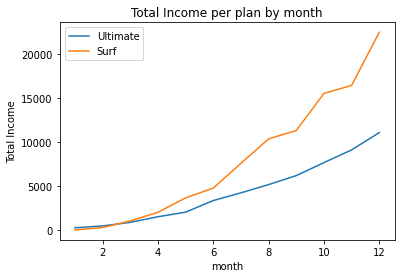

In [158]:
month_total_income.plot(x='month',y=['ultimate_total_income','surf_total_income']\
                        ,ylabel='Total Income',title='Total Income per plan by month').legend(['Ultimate','Surf']);

O valor da receita começou menor no plano surf, mas foi crescendo e após o mês 3 ficou acima do que o plano ultimate

Dados Estatísticos:

In [159]:
print('O desvio padrão do plano ultimate é:',np.std(user_profile_ultimate['total_income']))
print('A variância do plano ultimate é:',np.var(user_profile_ultimate['total_income']))
print('A média do plano ultimate é de:',user_profile_ultimate['total_income'].mean())
print('A mediana do plano ultimate é:',user_profile_ultimate['total_income'].median())

O desvio padrão do plano ultimate é: 11.387191946748715
A variância do plano ultimate é: 129.66814043209877
A média do plano ultimate é de: 72.31388888888888
A mediana do plano ultimate é: 70.0


In [160]:
print('O desvio padrão do plano surf é:',np.std(user_profile_surf['total_income']))
print('A variância do plano surf é:',np.var(user_profile_surf['total_income']))
print('A média do plano surf é de:',user_profile_surf['total_income'].mean())
print('A mediana do plano surf é:',user_profile_surf['total_income'].median())

O desvio padrão do plano surf é: 55.37043293915106
A variância do plano surf é: 3065.8848438690247
A média do plano surf é de: 60.706408137317226
A mediana do plano surf é: 40.36


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Correto. O estudante executou as seguintes etapas:
    
- Usou corretamente gráficos de barras e linhas para apresentar análises temporais
- Usou histogramas e boxplots para analisar a distribuição dos dados
- Calculou a média, variância e desvio padrão para as variáveis
- Apresentou conclusões pertinentes
</div>

## Teste hipóteses estatísticas

[Teste a hipótese de que as receitas médias dos usuários dos planos de chamadas Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [165]:
# Teste as hipóteses
#Hipóte nula: as receitas médias são iguais
#Hipótese alternativa: as receitas médias são diferentes
#Vamos considerar alpha=0.05
#Vamos utilizar o t-test independente, pois são variáveis que não tem interdependência
#Checar se podemos assumir que as variâncias podem ser consideradas iguais. 
#Para isso o ratio var1/var2 é menor que 4 onde var1>var2
var1 = np.var(user_profile_surf['total_income']) 
var2 = np.var(user_profile_ultimate['total_income'])
if var1> var2:
    if var1/var2< 4:
        alpha=0.05
        result1 = st.ttest_ind(user_profile_surf['total_income'],user_profile_ultimate['total_income'])
        print('valor-p',result1.pvalue)
        if result1.pvalue < alpha:
            print("Hipótese nula rejeitada.")
        else:
            print("Hipótese nula não pode ser rejeitada")
    else:
        alpha=0.05
        result1 = st.ttest_ind(user_profile_surf['total_income'],user_profile_ultimate['total_income'],equal_var=False)
        print('valor-p',result1.pvalue)
        if result1.pvalue < alpha:
            print("Hipótese nula rejeitada.")
        else:
            print("Hipótese nula não pode ser rejeitada")
else:
    if var2/var1 < 4:
        alpha=0.05
        result1 = st.ttest_ind(user_profile_surf['total_income'],user_profile_ultimate['total_income'])
        print('valor-p',result1.pvalue)
        if result1.pvalue < alpha:
            print("Hipótese nula rejeitada.")
        else:
            print("Hipótese nula não pode ser rejeitada")
    else:
        alpha=0.05
        result1 = st.ttest_ind(user_profile_surf['total_income'],user_profile_ultimate['total_income'],equal_var=False)
        print('valor-p',result1.pvalue)
        if result1.pvalue < alpha:
            print("Hipótese nula rejeitada.")
        else:
            print("Hipótese nula não pode ser rejeitada")
    



valor-p 3.17039054811355e-15
Hipótese nula rejeitada.


In [167]:
print(var1/var2)

23.64408738840893


- Podemos inferir que embora os valores sejam diferentes eles tem uma probabildiade muito baixa de serem obtidos aleatoriamente

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>Esse teste pode ter o resultado impactado pelo `join` feito usando o `inner` umas etapas anteriores. Faça o ajuste e iremos analisar esse teste novamente. Além disso, verifique as premissas do teste-t e configure o argumento `equal_var` da função `ttest_ind` de corretamente. </s>
    
<br>

<s>Premissas do teste-t: https://www.statology.org/t-test-assumptions/</s>
    
<br>
    
<s>Aqui está uma descrição dos seus argumentos: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.</s>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2</b> <a class="tocSkip"></a>
    
Perfeito!

</div>

[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [162]:
# Teste as hipóteses
NY_user_profile=user_profile[user_profile['city'].str.contains('NY')]
print('A receita média dos usuários de NY-NJ é de:',NY_user_profile['total_income'].mean())
print('A receita média dos usuários é de:',user_profile['total_income'].mean())

A receita média dos usuários de NY-NJ é de: 60.90492610837439
A receita média dos usuários é de: 64.3511469690362


Teste de hipótese:
- Hipóte nula: as receitas médias dos usuárias são iguais em todas as regiões
- Hipótese alternativa: as receitas médias são diferentes na região de NY_NJ
- Vamos considerar alpha=0.05
- Vamos utilizar o t-test independente, pois são variáveis que não tem interdependência

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante formalizou as hipóteses nula e alternativa.
</div>

In [168]:
#Checar se podemos assumir que as variâncias podem ser consideradas iguais. 
#Para isso o ratio var1/var2 é menor que 4 onde var1>var2
var1 = np.var(user_profile['total_income']) 
var2 = np.var(NY_user_profile['total_income'])
if var1> var2:
    if var1/var2< 4:
        alpha = 0.05
        result2=st.ttest_ind(user_profile['total_income'],NY_user_profile['total_income'])
        print('p-value',result2.pvalue)
        if result2.pvalue<alpha:
            print('A hipótese nula deve ser rejeitada.')
        else:
            print('A hipótese nula não deve ser rejeitada.')
    else:
        alpha = 0.05
        result2=st.ttest_ind(user_profile['total_income'],NY_user_profile['total_income'],equal_var=False)
        print('p-value',result2.pvalue)
        if result2.pvalue<alpha:
            print('A hipótese nula deve ser rejeitada.')
        else:
            print('A hipótese nula não deve ser rejeitada.')
else:
    if var2/var1 < 4:
        alpha = 0.05
        result2=st.ttest_ind(user_profile['total_income'],NY_user_profile['total_income'])
        print('p-value',result2.pvalue)
        if result2.pvalue<alpha:
            print('A hipótese nula deve ser rejeitada.')
        else:
            print('A hipótese nula não deve ser rejeitada.')
    else:
        alpha = 0.05
        result2=st.ttest_ind(user_profile['total_income'],NY_user_profile['total_income'],equal_var=False)
        print('p-value',result2.pvalue)
        if result2.pvalue<alpha:
            print('A hipótese nula deve ser rejeitada.')
        else:
            print('A hipótese nula não deve ser rejeitada.')
        

p-value 0.16732929659337667
A hipótese nula não deve ser rejeitada.


- Podemos inferir que embora os resultados sejam diferentes temos uma alta probabilidade, `16,73%`, de obter aleatoriamente uma diferença desse tamanho ou maior.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>Mesma observação aqui sobre o teste-t.</s>
</div>

## Conclusão geral

[Liste suas conclusões importantes nessa seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.]

- Foi seguido a metodologia de EDA: verificar e corrigir erros do datframe
- Feito feature enginnering para criar colunas que mais informações com base nos dados já fornecidos
- Utilizado conceitos da estatística descritiva pra analisar matematicamente os dados e poder fazer inferições
- Feito uso do teste de hipótese t-test independente para faazer comparações e testes de hipóteses entre os planos
- Embora o valor do plano ultimate seja maior ele não é o que gera mais receita
- Todos os gastos:chamadas, mensagens e internet seguem uma curva crescente ao longo do ano
- O único gasto que é próximo no plano ultimate e surf é o de chamadas
- Em todos os outros seguem o memso padrão, crescimento exponencial do plano surf após 3 meses.
- Provavelmente as pessoas tem a ilusão de que gastam menos no plano surf, o que o leva a ter um número maior de usuários e usuários com maior gastos.
- Talvez o plano ultimate esteja superdimensionado, fazendo com que poucos usuários excedam os limites do plano.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor:</b> <a class="tocSkip"></a>

<s>Aqui você poderia fazer uma conclusão mais detalhadas dos passos que você executou nesse projeto, as hipóteses e suas conclusões.</s>

</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>

<s>Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado
- Análise estatística descritiva interessante
- Apresentação correta de gráficos
- Explorou corretamente os atributos e fez transformações quando necessário
- Comentários sucintos e bem objetivos
- Conclusões pertinentes em cada análise e etapa de avaliação
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. Em resumo, precisamos:
- Ajustar o `join` para não descartar usuários que não sejam contemplados em outras tabelas/conjuntos de dados
- Revisitar suas análises após o ajuste no `join`, pois os resultados podem mudar.
    
<br>

Qualquer dúvida, pode contar comigo.

<br>

**Até breve!**</s>

</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor v2</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes necessários, essa versão do seu trabalho ficou muito melhor. Espero que as sugestões feitas aqui nesse notebook sejam úteis para futuros projetos. Continue assim, você está no caminho certo.
    
<br>

Qualquer dúvida, pode contar comigo.

<br>

**Até breve!**

</div>